In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [ ]:
data['Purchased'].value_counts(normalize=True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data = pd.get_dummies(data, dtype=int)

In [ ]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Gender_Female    400 non-null    int64
 5   Gender_Male      400 non-null    int64
dtypes: int64(6)
memory usage: 18.9 KB


In [ ]:
data['User ID'].nunique()

400

In [ ]:
y = data['Purchased']
X = data.drop(['User ID','Purchased'],axis=1)

In [ ]:
X.shape

(400, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
X_train.shape

(320, 4)

In [ ]:
X_test.shape

(80, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('F1 Score is', f1_score(y_test, y_pred))

Accuracy is 0.875
Precision is 0.875
Recall is 0.75
F1 Score is 0.8076923076923077


In [ ]:
confusion_matrix(y_test,y_pred)

array([[49,  3],
       [ 7, 21]])

KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.875,
 0.8625,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925]

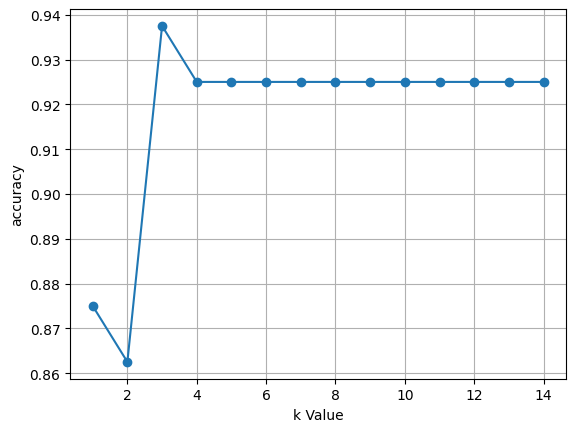

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('F1 Score is', f1_score(y_test, y_pred_knn))


Accuracy is 0.9375
Precision is 0.8709677419354839
Recall is 0.9642857142857143
F1 Score is 0.9152542372881356


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=1)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('F1 Score is', f1_score(y_test, y_pred_knn))

Accuracy is 0.925
Precision is 0.84375
Recall is 0.9642857142857143
F1 Score is 0.8999999999999999


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_svm_prediction))

[[48  4]
 [ 8 20]]


In [ ]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.85


In [ ]:
svm_clf1 = SVC(kernel='rbf')
svm_clf1.fit(X_train , y_train)
y_svm_prediction1 = svm_clf1.predict(X_test)
print(confusion_matrix(y_test,y_svm_prediction1))
print("accuracy score",accuracy_score(y_test,y_svm_prediction1))

[[47  5]
 [ 2 26]]
accuracy score 0.9125


In [ ]:
svm_clf2 = SVC(kernel='poly')
svm_clf2.fit(X_train , y_train)
y_svm_prediction2 = svm_clf2.predict(X_test)
print(confusion_matrix(y_test,y_svm_prediction2))
print("accuracy score",accuracy_score(y_test,y_svm_prediction2))

[[50  2]
 [ 8 20]]
accuracy score 0.875


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds_clf= DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt = ds_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))
print("accuracy score",accuracy_score(y_test,y_pred_dt))

[[42 10]
 [ 5 23]]
accuracy score 0.8125


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print("accuracy score",accuracy_score(y_test,y_pred_rf))

[[46  6]
 [ 2 26]]
accuracy score 0.9
